In [1]:
using DrWatson
@quickactivate "Simulation"
include(srcdir("Simulation.jl"))

import .Simulation as Sim
using ProgressMeter

  Activating project at `~/Documents/p5control-bluefors-evaluation/simulation`


In [ ]:
params = Sim.VarPar(
    max_ar=520,
    error=1e-7,
    t_coeff=0.55,
    temp=1e-7,
    voltage=range(0.05, 3.50, step=0.025),
    w=(-15.0, 15.0)
)
currents::Vector{Real} = zeros(length(params.voltage))

# check max_MAR
Sim.num_MAR(first(params.voltage), params)

47

In [3]:
progress = Progress(length(params.voltage), 1, "Processing ...")
Threads.@threads for i in 1:length(params.voltage)
    curr_v::Real = params.voltage[i]
    req_MAR::Int = Sim.num_MAR(curr_v, params)
    currents[i] = Real(Sim.∫(params, curr_v, req_MAR, 520))
    next!(progress)
end

Processing ... 100%|█████████████████████████████████████| Time: 0:18:05


In [9]:
# norm_currents = currents ./ (Sim.G_0*params.t_coeff);
norm_currents = currents;

In [5]:
open(datadir("D-T$(params.t_coeff).dat"), "w") do io
    for i in 1:length(params.voltage)
        println(io, params.voltage[i], "\t", currents[i])
    end
end
println("Data saved to $(datadir("D-T$(params.t_coeff).dat"))")

Data saved to /home/dacap/Documents/p5control-bluefors-evaluation/simulation/data/D-T0.8.dat


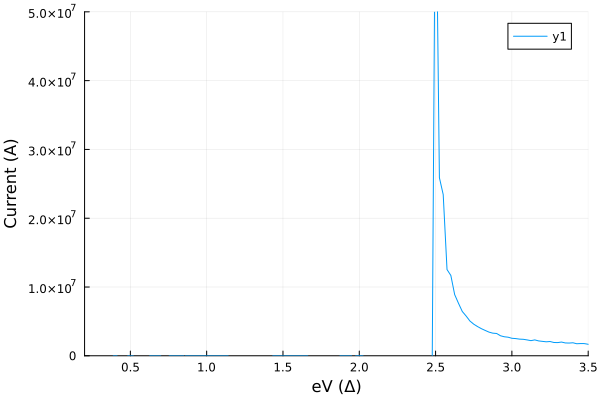

In [12]:
using Plots

plt = plot(
    params.voltage,
    norm_currents,
    xlabel="eV (Δ)",
    ylabel="Current (A)",
    grid=true,
)
xlims!(0.2,3.5)
ylims!(0, 5e7)

In [7]:
savefig(plt, plotsdir("IV-T0.95-HighRes.svg"))

"/home/dacap/Documents/p5control-bluefors-evaluation/simulation/plots/IV-T0.95-HighRes.svg"

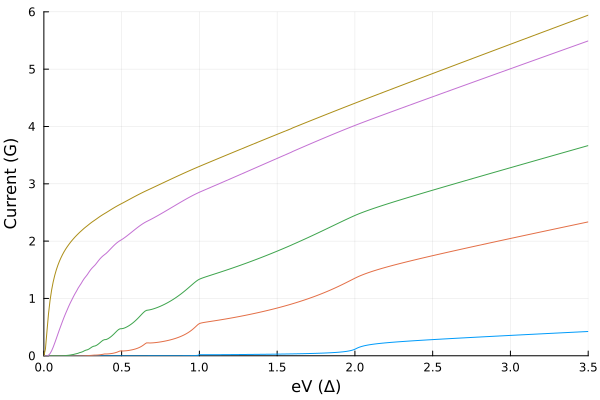

In [8]:
files = [
    "0.125",
    "0.55",
    "0.75",
    "0.95",
    "0.99"
]

plot()
for f in files
    ax = []
    curve = []
    open(datadir("C-T$(f).dat"),"r") do file
        for line in eachline(file)
            line = strip(line)
            line = replace(line, "\t"=>" ")
            line = split(line, " ")
            filter!(x -> x != "", line)
            x, y = line
            push!(ax, parse(Float64, x))
            push!(curve, parse(Float64, y))
        end
    end
    plot!(
        ax,
        curve,
        xlabel="eV (Δ)",
        ylabel="Current (G)",
        grid=true,
        legend=false,
    )
    xlims!(0,3.5)
    ylims!(0, 6)
end
plot!()